<a href="https://www.kaggle.com/code/mdnadeemakhtar/nba-active-players-eda?scriptVersionId=141673713" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# import imp. libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image
import os
from IPython.display import display, Image

# laod the dataset to pandas dataframe

In [2]:
data = pd.read_csv('/kaggle/input/nba-active-players-data-images/players.csv')

# take top 5 rows from start of dataset by default using head() if you want custom no of rows just put the no inside head()

In [3]:
data.head()

playerid     fname    lname        position height  weight    birthday  \
0   1630173  Precious  Achiuwa         Forward    6-8     225  1999-09-19   
1    203500    Steven    Adams          Center   6-11     265  1993-07-20   
2   1628389       Bam  Adebayo  Center-Forward    6-9     255  1997-07-18   
3   1630534     Ochai   Agbaji           Guard    6-5     215  2000-04-20   
4   1630583     Santi   Aldama  Forward-Center    7-0     215  2001-01-10   

       country           school  draft_year  draft_round  draft_number  
0      Nigeria          Memphis        2020          1.0          20.0  
1  New Zealand       Pittsburgh        2013          1.0          12.0  
2          USA         Kentucky        2017          1.0          14.0  
3          USA           Kansas        2022          1.0          14.0  
4        Spain  Loyola-Maryland        2021          1.0          30.0

# take top 5 rows from last of dataset by default using tail(). if you want custom no of rows just put the no inside tail()

In [4]:
data.tail()

playerid     fname      lname        position height  weight    birthday  \
543    201152  Thaddeus      Young         Forward    6-8     235  1988-06-21   
544   1629027      Trae      Young           Guard    6-1     164  1998-09-19   
545   1630209      Omer  Yurtseven          Center   6-11     275  1998-06-19   
546    203469      Cody     Zeller  Forward-Center   6-11     240  1992-10-05   
547   1627826     Ivica      Zubac          Center    7-0     240  1997-03-18   

     country        school  draft_year  draft_round  draft_number  
543      USA  Georgia Tech        2007          1.0          12.0  
544      USA      Oklahoma        2018          1.0           5.0  
545   Turkey    Georgetown        2020          NaN           NaN  
546      USA       Indiana        2013          1.0           4.0  
547  Croatia   Mega Basket        2016          2.0          32.0

# shape of data (no of rows & columns in dataset)

In [5]:
data.shape

(548, 12)

# get info about rows, columns, datatypes of columns and memory

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerid      548 non-null    int64  
 1   fname         548 non-null    object 
 2   lname         548 non-null    object 
 3   position      548 non-null    object 
 4   height        548 non-null    object 
 5   weight        548 non-null    int64  
 6   birthday      548 non-null    object 
 7   country       548 non-null    object 
 8   school        538 non-null    object 
 9   draft_year    548 non-null    int64  
 10  draft_round   409 non-null    float64
 11  draft_number  408 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 51.5+ KB


# check null values in dataset

In [7]:
data.isnull()

playerid  fname  lname  position  height  weight  birthday  country  \
0       False  False  False     False   False   False     False    False   
1       False  False  False     False   False   False     False    False   
2       False  False  False     False   False   False     False    False   
3       False  False  False     False   False   False     False    False   
4       False  False  False     False   False   False     False    False   
..        ...    ...    ...       ...     ...     ...       ...      ...   
543     False  False  False     False   False   False     False    False   
544     False  False  False     False   False   False     False    False   
545     False  False  False     False   False   False     False    False   
546     False  False  False     False   False   False     False    False   
547     False  False  False     False   False   False     False    False   

     school  draft_year  draft_round  draft_number  
0     False       False        False         False  
1     False       False        False         False  
2     False       False        False         False  
3     False       False        False         False  
4     False       False        False         False  
..      ...         ...          ...           ...  
543   False       False        False         False  
544   False       False        False         False  
545   False       False         True          True  
546   False       False        False         False  
547   False       False        False         False  

[548 rows x 12 columns]

# total null values in dataset

In [8]:
data.isnull().sum()

playerid          0
fname             0
lname             0
position          0
height            0
weight            0
birthday          0
country           0
school           10
draft_year        0
draft_round     139
draft_number    140
dtype: int64

# drop null values

In [9]:
data = data.dropna()

In [10]:
data.isnull().sum()

playerid        0
fname           0
lname           0
position        0
height          0
weight          0
birthday        0
country         0
school          0
draft_year      0
draft_round     0
draft_number    0
dtype: int64

# check duplicate values


In [11]:
data.duplicated().sum()

0

there is no duplicate values but if you have then you can use below code


In [12]:
data.drop_duplicates()

playerid     fname    lname        position height  weight    birthday  \
0     1630173  Precious  Achiuwa         Forward    6-8     225  1999-09-19   
1      203500    Steven    Adams          Center   6-11     265  1993-07-20   
2     1628389       Bam  Adebayo  Center-Forward    6-9     255  1997-07-18   
3     1630534     Ochai   Agbaji           Guard    6-5     215  2000-04-20   
4     1630583     Santi   Aldama  Forward-Center    7-0     215  2001-01-10   
..        ...       ...      ...             ...    ...     ...         ...   
540   1626153     Delon   Wright           Guard    6-5     185  1992-04-26   
543    201152  Thaddeus    Young         Forward    6-8     235  1988-06-21   
544   1629027      Trae    Young           Guard    6-1     164  1998-09-19   
546    203469      Cody   Zeller  Forward-Center   6-11     240  1992-10-05   
547   1627826     Ivica    Zubac          Center    7-0     240  1997-03-18   

         country           school  draft_year  draft_round  draft_number  
0        Nigeria          Memphis        2020          1.0          20.0  
1    New Zealand       Pittsburgh        2013          1.0          12.0  
2            USA         Kentucky        2017          1.0          14.0  
3            USA           Kansas        2022          1.0          14.0  
4          Spain  Loyola-Maryland        2021          1.0          30.0  
..           ...              ...         ...          ...           ...  
540          USA             Utah        2015          1.0          20.0  
543          USA     Georgia Tech        2007          1.0          12.0  
544          USA         Oklahoma        2018          1.0           5.0  
546          USA          Indiana        2013          1.0           4.0  
547      Croatia      Mega Basket        2016          2.0          32.0  

[403 rows x 12 columns]

In [13]:
data.head()

playerid     fname    lname        position height  weight    birthday  \
0   1630173  Precious  Achiuwa         Forward    6-8     225  1999-09-19   
1    203500    Steven    Adams          Center   6-11     265  1993-07-20   
2   1628389       Bam  Adebayo  Center-Forward    6-9     255  1997-07-18   
3   1630534     Ochai   Agbaji           Guard    6-5     215  2000-04-20   
4   1630583     Santi   Aldama  Forward-Center    7-0     215  2001-01-10   

       country           school  draft_year  draft_round  draft_number  
0      Nigeria          Memphis        2020          1.0          20.0  
1  New Zealand       Pittsburgh        2013          1.0          12.0  
2          USA         Kentucky        2017          1.0          14.0  
3          USA           Kansas        2022          1.0          14.0  
4        Spain  Loyola-Maryland        2021          1.0          30.0

# count the no of players in each country

In [14]:
data['country'].value_counts()

country
USA                       304
Canada                     19
France                      8
Australia                   6
Germany                     4
Croatia                     4
Serbia                      4
Nigeria                     4
Spain                       4
Bahamas                     3
Turkey                      3
Cameroon                    3
Greece                      3
Slovenia                    3
Lithuania                   2
Japan                       2
Dominican Republic          2
Ukraine                     2
United Kingdom              2
DRC                         2
Georgia                     2
Latvia                      2
Brazil                      1
Portugal                    1
Poland                      1
Austria                     1
Bosnia and Herzegovina      1
Jamaica                     1
Angola                      1
Finland                     1
Czech Republic              1
Israel                      1
Senegal                     1
Ne

# Distribution of players by country with the help of bar graph

In [15]:
player_distribution_by_country = data['country'].value_counts()
fig, ax = plt.subplots(figsize=(16, 5))
player_distribution_by_country.plot(kind='bar', color='red')
plt.ylabel('Count', color='green',size=20)
plt.xlabel('Country', color='indigo',size=20)
plt.title('Distribution of players by country', color='blue',size=22)

plt.xticks(rotation=90) #Rotate the country names for better readability 
                        # Note:- if you won't provide rotation then it automatically takes 90 degree

plt.show()

# Top countries with the most players

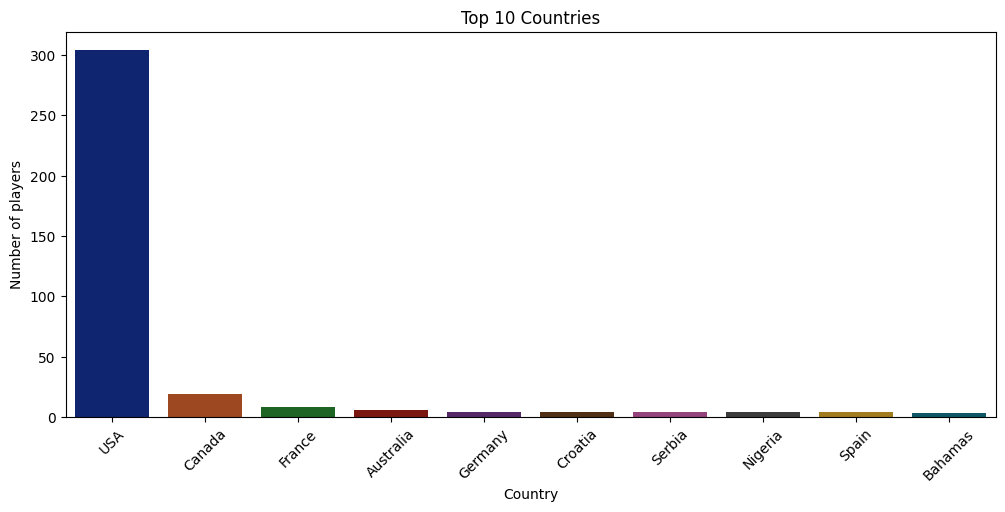

In [16]:
player_distribution_by_country = data['country'].value_counts()
# Select the top 10 countries with the most company for visualization
top_countries = player_distribution_by_country[:10]
# Plot size
plt.figure(figsize=(12, 5))
# Create a bar plot for the number of company in each country
sns.barplot(x=top_countries.index, y=top_countries.values, palette='dark')
# Title and labels
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of players')

plt.xticks(rotation=45) # Rotate the country names for better readability

plt.show()

# Distribution of players by country with the help of pie chart

In [17]:
players_distribution_by_country = data['country'].value_counts()
plt.figure(figsize=(32,  32))
players_distribution_by_country.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=plt.cm.Paired.colors)

# Create a pie chart
plt.title('Distribution of players by Country',color='indigo',size=40)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

# count the no of players in each position of NBA

In [18]:
data.head()['position'].values

array(['Forward', 'Center', 'Center-Forward', 'Guard', 'Forward-Center'],
      dtype=object)

In [19]:
data['position'].value_counts()

position
Guard             154
Forward           114
Center             36
Guard-Forward      34
Forward-Center     30
Center-Forward     21
Forward-Guard      14
Name: count, dtype: int64

# Distribution of players by position with the help of bar graph

In [20]:
player_distribution_by_position = data['position'].value_counts()
fig, ax = plt.subplots(figsize=(12, 5))
player_distribution_by_position.plot(kind='bar', color=('blue','red','olive','green','magenta','cyan','violet'))
plt.ylabel('Count', color='green',size=17)
plt.xlabel('position', color='red',size=17)
plt.title('Distribution of players by holding position', color='indigo',size=22)

plt.xticks(rotation=30) #Rotate the country names for better readability 
                        # Note:- if you won't provide rotation then it automatically takes 90 degree
plt.show()

# Distribution of players by position with the help of pie chart

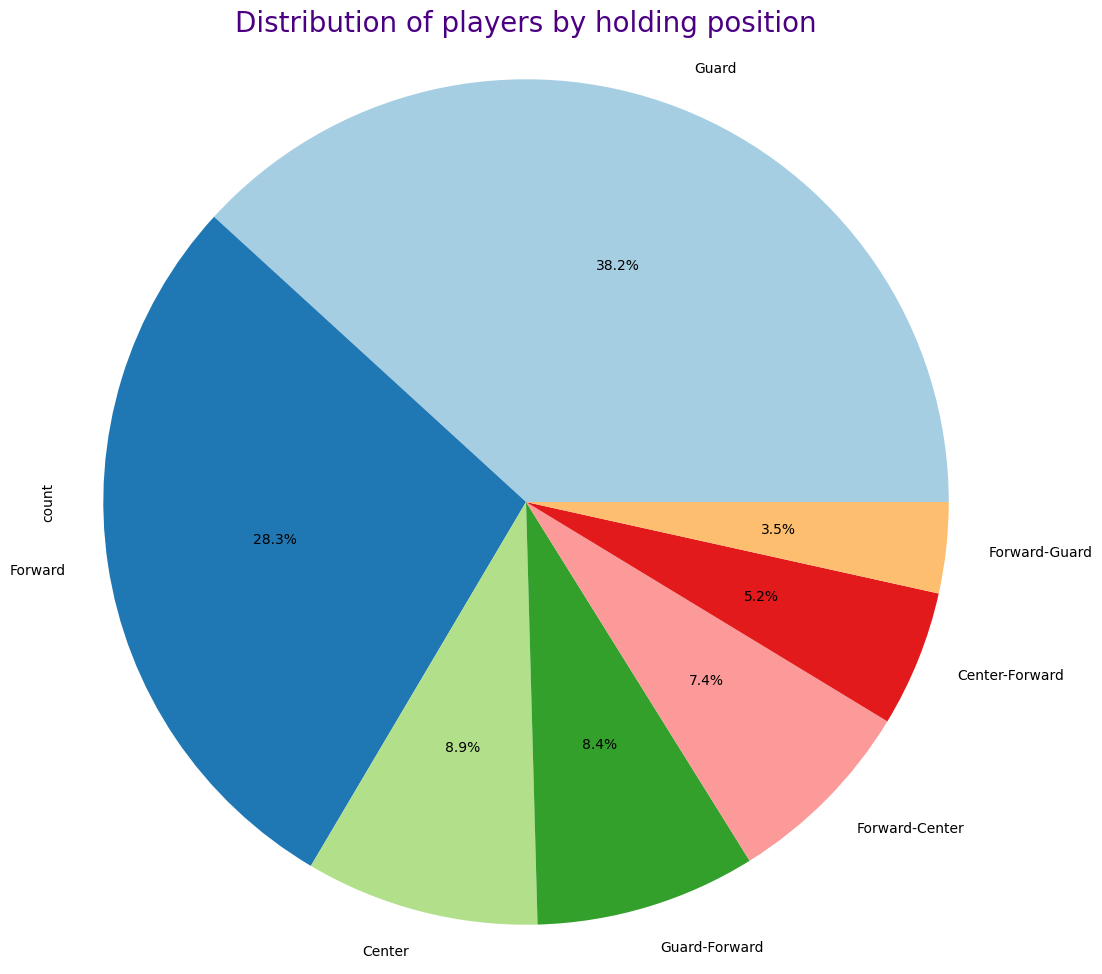

In [21]:
player_distribution_by_position = data['position'].value_counts()
plt.figure(figsize=(12,  12))
player_distribution_by_position.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=plt.cm.Paired.colors)

# Create a pie chart
plt.title('Distribution of players by holding position',color='indigo',size=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

In [22]:
data.head()['school'].values

array(['Memphis', 'Pittsburgh', 'Kentucky', 'Kansas', 'Loyola-Maryland'],
      dtype=object)

In [23]:
data['school'].value_counts()

school
Kentucky                26
Duke                    24
Kansas                  10
Arizona                 10
Texas                   10
                        ..
Poitiers Basket 86       1
Pepperdine               1
Pittsburgh               1
New Zealand Breakers     1
Belmont                  1
Name: count, Length: 137, dtype: int64

# Distribution of players by school with the help of pie chart

In [24]:
player_distribution_by_school = data['school'].value_counts()
plt.figure(figsize=(80,80))
player_distribution_by_school.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=plt.cm.Paired.colors)

# Create a pie chart
plt.title('Distribution of players by holding school',color='indigo',size=40)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

In [25]:
data['draft_round'].value_counts()

draft_round
1.0    280
2.0    123
Name: count, dtype: int64

In [26]:
# Remove the decimal part by converting to integer
#data['draft_round'] = data['draft_round'].astype(int)

# distribution of players in each round

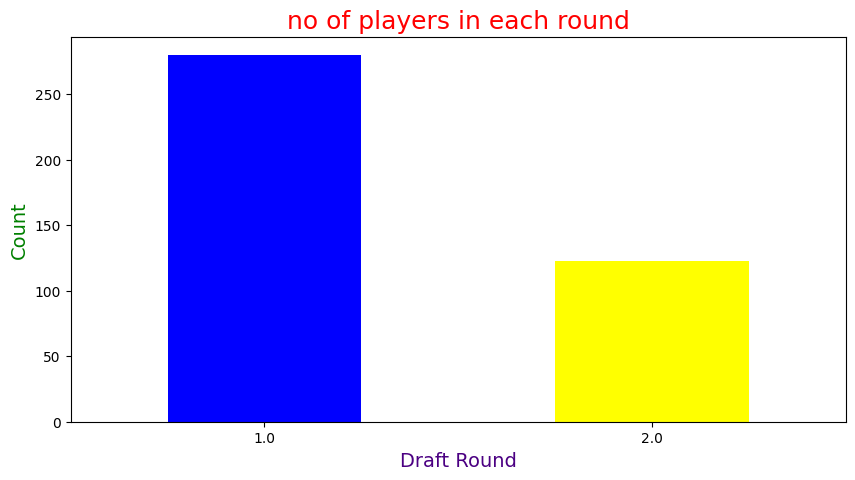

In [27]:
x = data['draft_round'].value_counts()
fig, ax = plt.subplots(figsize=(10, 5))
x.plot(kind='bar', color=('blue','yellow'),ax=ax)
plt.xlabel('Draft Round', color='indigo', size=14)
plt.ylabel('Count', color='green', size=14)
plt.title('no of players in each round', color='red', size=18)
plt.xticks(rotation=0)
plt.show()

In [28]:
data['draft_year'].value_counts()

draft_year
2021    51
2022    48
2020    42
2019    42
2018    38
2017    30
2015    25
2014    22
2013    19
2016    18
2011    17
2012    13
2008    12
2009    11
2007     5
2010     4
2006     3
2004     1
2003     1
2005     1
Name: count, dtype: int64

# drafted players distribution by each year using bar graph

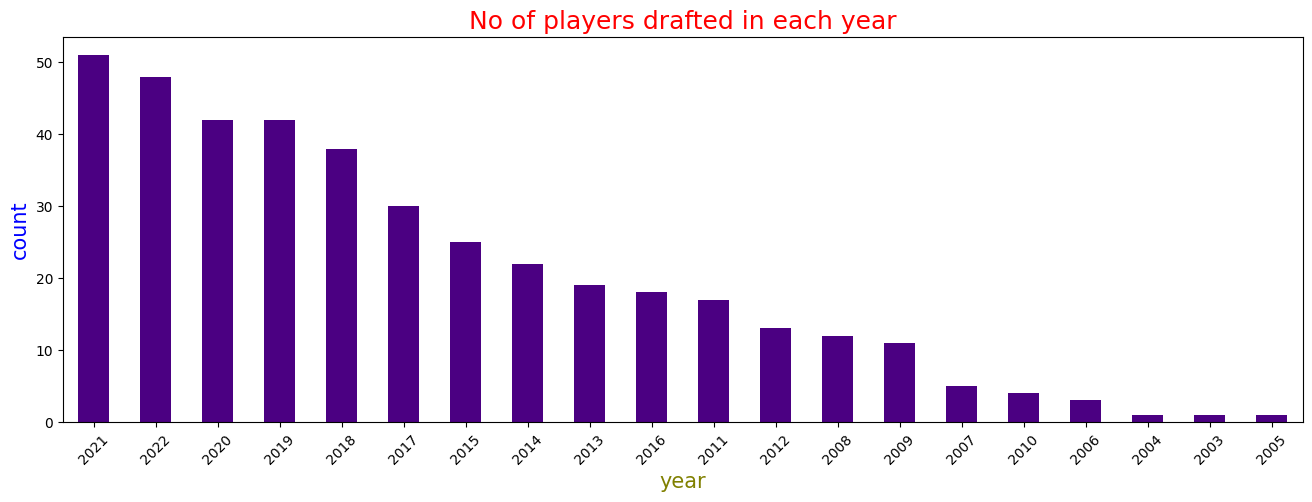

In [29]:
drafted_players_distribution_by_year  = data['draft_year'].value_counts()
fig, ax = plt.subplots(figsize = (16,5))
drafted_players_distribution_by_year.plot(kind='bar' , color='indigo')
plt.xlabel('year', color='olive', size=15)
plt.ylabel('count', color='blue', size=15)
plt.title("No of players drafted in each year", color='red', size=18)
plt.xticks(rotation=45)
plt.show()

# drafted players distribution by each year using pie chart

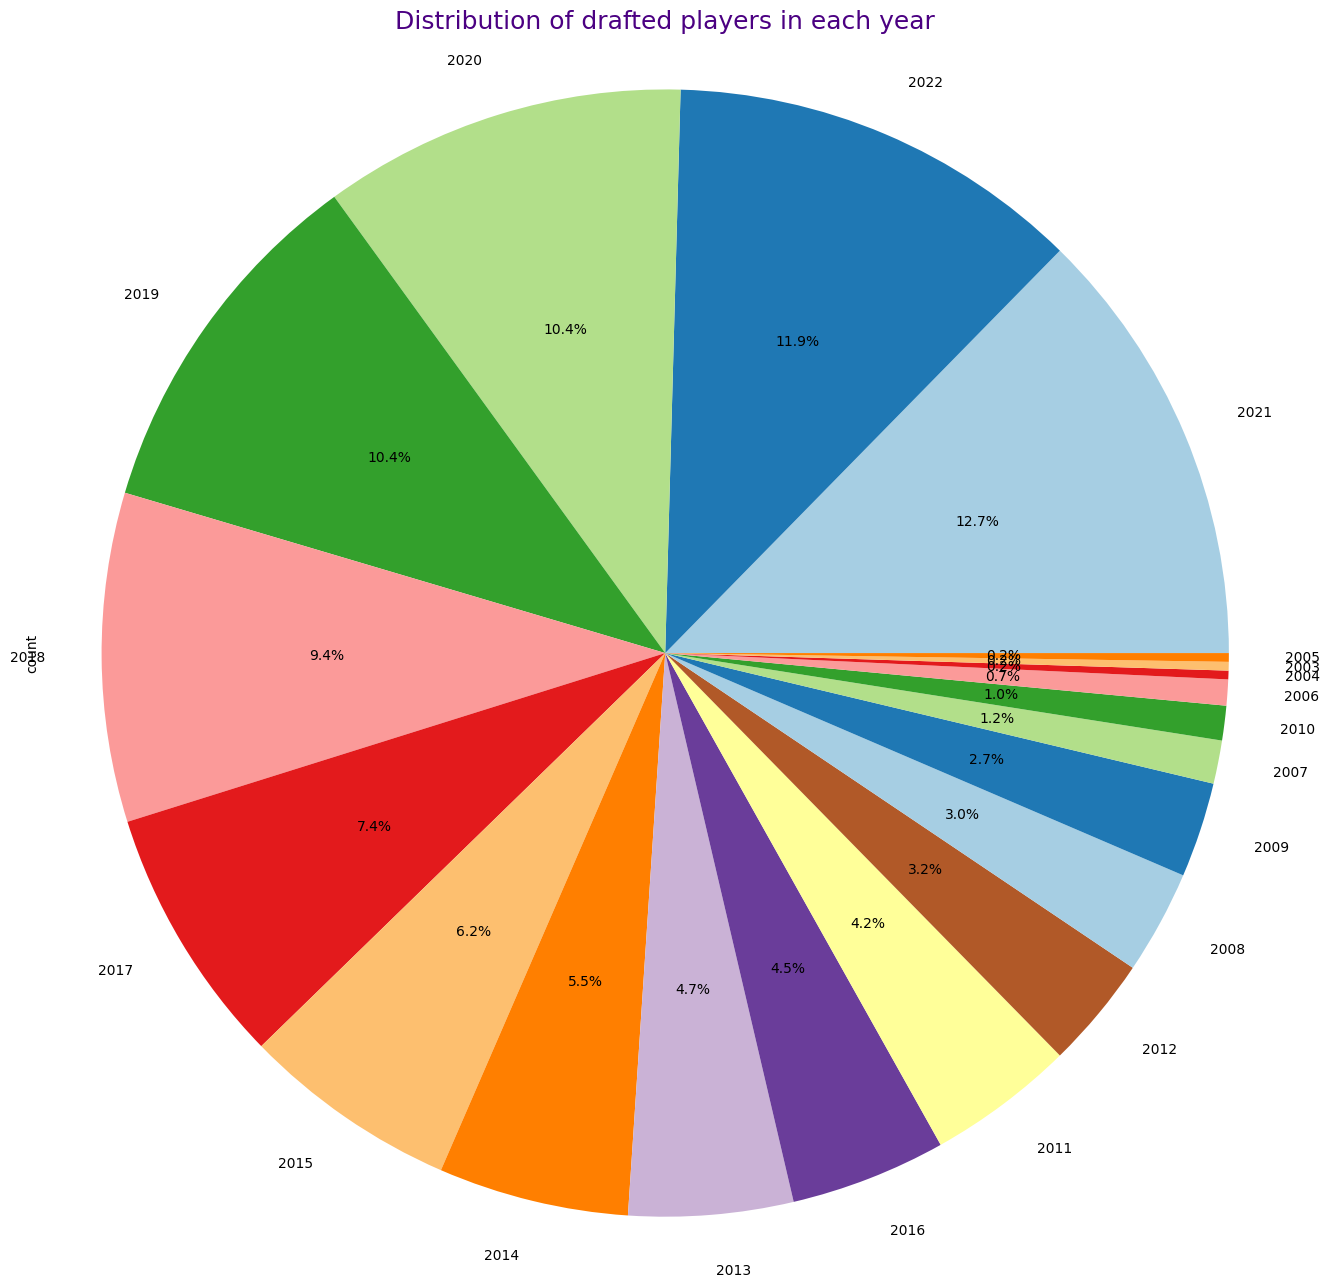

In [30]:
drafted_players_distribution_by_year  = data['draft_year'].value_counts()
plt.figure(figsize=(16,16))
drafted_players_distribution_by_year.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=plt.cm.Paired.colors)

# Create a pie chart
plt.title('Distribution of drafted players in each year',color='indigo',size=18)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

In [31]:
data.head()

playerid     fname    lname        position height  weight    birthday  \
0   1630173  Precious  Achiuwa         Forward    6-8     225  1999-09-19   
1    203500    Steven    Adams          Center   6-11     265  1993-07-20   
2   1628389       Bam  Adebayo  Center-Forward    6-9     255  1997-07-18   
3   1630534     Ochai   Agbaji           Guard    6-5     215  2000-04-20   
4   1630583     Santi   Aldama  Forward-Center    7-0     215  2001-01-10   

       country           school  draft_year  draft_round  draft_number  
0      Nigeria          Memphis        2020          1.0          20.0  
1  New Zealand       Pittsburgh        2013          1.0          12.0  
2          USA         Kentucky        2017          1.0          14.0  
3          USA           Kansas        2022          1.0          14.0  
4        Spain  Loyola-Maryland        2021          1.0          30.0

In [32]:
# Join the columns using the + operator
data['name'] = data['fname'] + ' ' + data['lname']

In [33]:
data.head()

playerid     fname    lname        position height  weight    birthday  \
0   1630173  Precious  Achiuwa         Forward    6-8     225  1999-09-19   
1    203500    Steven    Adams          Center   6-11     265  1993-07-20   
2   1628389       Bam  Adebayo  Center-Forward    6-9     255  1997-07-18   
3   1630534     Ochai   Agbaji           Guard    6-5     215  2000-04-20   
4   1630583     Santi   Aldama  Forward-Center    7-0     215  2001-01-10   

       country           school  draft_year  draft_round  draft_number  \
0      Nigeria          Memphis        2020          1.0          20.0   
1  New Zealand       Pittsburgh        2013          1.0          12.0   
2          USA         Kentucky        2017          1.0          14.0   
3          USA           Kansas        2022          1.0          14.0   
4        Spain  Loyola-Maryland        2021          1.0          30.0   

               name  
0  Precious Achiuwa  
1      Steven Adams  
2       Bam Adebayo  
3      Ochai Agbaji  
4      Santi Aldama

In [34]:
data.drop(['fname','lname'],axis=1,inplace=True)

In [35]:
data.head()

playerid        position height  weight    birthday      country  \
0   1630173         Forward    6-8     225  1999-09-19      Nigeria   
1    203500          Center   6-11     265  1993-07-20  New Zealand   
2   1628389  Center-Forward    6-9     255  1997-07-18          USA   
3   1630534           Guard    6-5     215  2000-04-20          USA   
4   1630583  Forward-Center    7-0     215  2001-01-10        Spain   

            school  draft_year  draft_round  draft_number              name  
0          Memphis        2020          1.0          20.0  Precious Achiuwa  
1       Pittsburgh        2013          1.0          12.0      Steven Adams  
2         Kentucky        2017          1.0          14.0       Bam Adebayo  
3           Kansas        2022          1.0          14.0      Ochai Agbaji  
4  Loyola-Maryland        2021          1.0          30.0      Santi Aldama

In [36]:
data = data[['playerid','name','position','height','weight','birthday','country','school','draft_year','draft_round','draft_number']]

In [37]:
data.head()

playerid              name        position height  weight    birthday  \
0   1630173  Precious Achiuwa         Forward    6-8     225  1999-09-19   
1    203500      Steven Adams          Center   6-11     265  1993-07-20   
2   1628389       Bam Adebayo  Center-Forward    6-9     255  1997-07-18   
3   1630534      Ochai Agbaji           Guard    6-5     215  2000-04-20   
4   1630583      Santi Aldama  Forward-Center    7-0     215  2001-01-10   

       country           school  draft_year  draft_round  draft_number  
0      Nigeria          Memphis        2020          1.0          20.0  
1  New Zealand       Pittsburgh        2013          1.0          12.0  
2          USA         Kentucky        2017          1.0          14.0  
3          USA           Kansas        2022          1.0          14.0  
4        Spain  Loyola-Maryland        2021          1.0          30.0

In [38]:
# Load the list of image files that ends with .png
image_files = [f for f in os.listdir('/kaggle/input/nba-active-players-data-images/img') if f.endswith('.png')]

# Extract player IDs from filenames (remove '.png')
playerid = [f.replace('.png', '') for f in image_files]

# Create a DataFrame using the filenames and player IDs
data_1 = {'Filename': [os.path.join('/kaggle/input/nba-active-players-data-images/img', f) for f in image_files], 'playerid': playerid}

df = pd.DataFrame(data_1)

print(df)


                                              Filename playerid
0    /kaggle/input/nba-active-players-data-images/i...  1630227
1    /kaggle/input/nba-active-players-data-images/i...   201599
2    /kaggle/input/nba-active-players-data-images/i...  1630167
3    /kaggle/input/nba-active-players-data-images/i...  1630624
4    /kaggle/input/nba-active-players-data-images/i...  1628988
..                                                 ...      ...
539  /kaggle/input/nba-active-players-data-images/i...  1629022
540  /kaggle/input/nba-active-players-data-images/i...  1630559
541  /kaggle/input/nba-active-players-data-images/i...  1630558
542  /kaggle/input/nba-active-players-data-images/i...  1629628
543  /kaggle/input/nba-active-players-data-images/i...  1631111

[544 rows x 2 columns]


In [39]:
for i in range(10):
    print(image_files[i])

1630227.png
201599.png
1630167.png
1630624.png
1628988.png
1629643.png
203471.png
203473.png
1626166.png
203500.png


In [40]:
len(image_files )

544

In [41]:
df.head()

Filename playerid
0  /kaggle/input/nba-active-players-data-images/i...  1630227
1  /kaggle/input/nba-active-players-data-images/i...   201599
2  /kaggle/input/nba-active-players-data-images/i...  1630167
3  /kaggle/input/nba-active-players-data-images/i...  1630624
4  /kaggle/input/nba-active-players-data-images/i...  1628988

In [42]:
df.head()['Filename'].values


array(['/kaggle/input/nba-active-players-data-images/img/1630227.png',
       '/kaggle/input/nba-active-players-data-images/img/201599.png',
       '/kaggle/input/nba-active-players-data-images/img/1630167.png',
       '/kaggle/input/nba-active-players-data-images/img/1630624.png',
       '/kaggle/input/nba-active-players-data-images/img/1628988.png'],
      dtype=object)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  544 non-null    object
 1   playerid  544 non-null    object
dtypes: object(2)
memory usage: 8.6+ KB


In [44]:
df['playerid'] = df['playerid'].astype(int)

In [45]:
df.head()['playerid'].values

array([1630227,  201599, 1630167, 1630624, 1628988])

In [46]:
df.head()['Filename'].values

array(['/kaggle/input/nba-active-players-data-images/img/1630227.png',
       '/kaggle/input/nba-active-players-data-images/img/201599.png',
       '/kaggle/input/nba-active-players-data-images/img/1630167.png',
       '/kaggle/input/nba-active-players-data-images/img/1630624.png',
       '/kaggle/input/nba-active-players-data-images/img/1628988.png'],
      dtype=object)

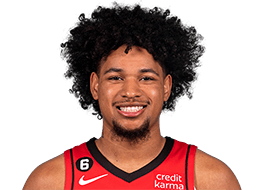

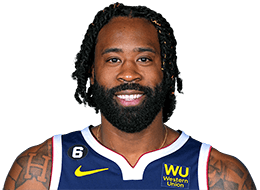

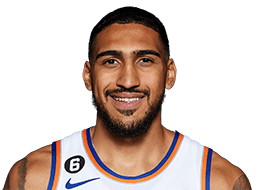

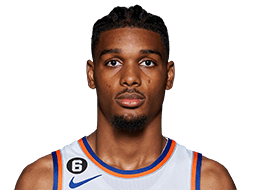

In [47]:
# Display the top 5 images
for filename in df['Filename'].head():
    display(Image(filename=filename))


In [48]:
data.head()['playerid'].values

array([1630173,  203500, 1628389, 1630534, 1630583])

In [49]:
# Merge player data and image list based on PlayerID
# if you don't have data in same order then you have to specify column name in left_on and right_on
data = data.merge(df, left_on='playerid', right_on='playerid')  
# if you have data in same order then just merge dataset based on column name. EX:- data = data.merge(df, on='playerid')

In [50]:
data.head()

playerid              name        position height  weight    birthday  \
0   1630173  Precious Achiuwa         Forward    6-8     225  1999-09-19   
1    203500      Steven Adams          Center   6-11     265  1993-07-20   
2   1628389       Bam Adebayo  Center-Forward    6-9     255  1997-07-18   
3   1630534      Ochai Agbaji           Guard    6-5     215  2000-04-20   
4   1630583      Santi Aldama  Forward-Center    7-0     215  2001-01-10   

       country           school  draft_year  draft_round  draft_number  \
0      Nigeria          Memphis        2020          1.0          20.0   
1  New Zealand       Pittsburgh        2013          1.0          12.0   
2          USA         Kentucky        2017          1.0          14.0   
3          USA           Kansas        2022          1.0          14.0   
4        Spain  Loyola-Maryland        2021          1.0          30.0   

                                            Filename  
0  /kaggle/input/nba-active-players-data-images/i...  
1  /kaggle/input/nba-active-players-data-images/i...  
2  /kaggle/input/nba-active-players-data-images/i...  
3  /kaggle/input/nba-active-players-data-images/i...  
4  /kaggle/input/nba-active-players-data-images/i...

Player Name: LeBron James
Position: Forward
Height: 6-9
Weight(pounds): 250
Birthday: 1984-12-30
Country: USA
School: St. Vincent-St. Mary HS (OH)
Draft Year: 2003
Draft Round: 1.0
Draft Number: 1.0
player image: /kaggle/input/nba-active-players-data-images/img/2544.png


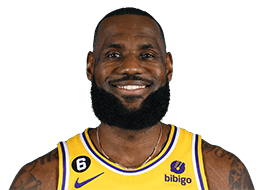

In [51]:
def get_player_details(player_name):
    player_details = data[data['name'] == player_name]

    if not  player_details.empty:
        # Extract the row of company data
        player_row = player_details.iloc[0]

        # Display company details
        print(f"Player Name: {player_row['name']}")
        print(f"Position: {player_row['position']}")
        print(f"Height: {player_row['height']}")
        print(f"Weight(pounds): {player_row['weight']}")
        print(f"Birthday: {player_row['birthday']}")
        print(f"Country: {player_row['country']}")
        print(f"School: {player_row['school']}")
        print(f"Draft Year: {player_row['draft_year']}")
        print(f"Draft Round: {player_row['draft_round']}")
        print(f"Draft Number: {player_row['draft_number']}")
        print(f"player image: {player_row['Filename']}")
        
        # Display player image
        display(Image(filename=player_row['Filename']))
    else:
        print(f"No details found for company: {Company}")

# Test the function with a specific company
get_player_details('LeBron James')

In [52]:
def get_player_details(player_name):
    player_details = data[data['name'] == player_name]

    if not  player_details.empty:
        # Extract the row of company data
        player_row = player_details.iloc[0]

        # Display company details
        print(f"Player Name: {player_row['name']}")
        print(f"Position: {player_row['position']}")
        print(f"Height: {player_row['height']}")
        print(f"Weight(pounds): {player_row['weight']}")
        print(f"Birthday: {player_row['birthday']}")
        print(f"Country: {player_row['country']}")
        print(f"School: {player_row['school']}")
        print(f"Draft Year: {player_row['draft_year']}")
        print(f"Draft Round: {player_row['draft_round']}")
        print(f"Draft Number: {player_row['draft_number']}")
        print(f"player image: {player_row['Filename']}")
        
        # Display player image
        display(Image(filename=player_row['Filename']))
    else:
        print(f"No details found for company: {Company}")

# Test the function with a specific company
get_player_details('Kawhi Leonard')

Player Name: Kawhi Leonard
Position: Forward
Height: 6-7
Weight(pounds): 225
Birthday: 1991-06-29
Country: USA
School: San Diego State
Draft Year: 2011
Draft Round: 1.0
Draft Number: 15.0
player image: /kaggle/input/nba-active-players-data-images/img/202695.png


Player Name: James Harden
Position: Guard
Height: 6-5
Weight(pounds): 220
Birthday: 1989-08-26
Country: USA
School: Arizona State
Draft Year: 2009
Draft Round: 1.0
Draft Number: 3.0
player image: /kaggle/input/nba-active-players-data-images/img/201935.png


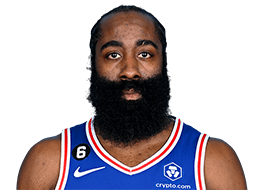

In [53]:
def get_player_details(player_name):
    player_details = data[data['name'] == player_name]

    if not  player_details.empty:
        # Extract the row of company data
        player_row = player_details.iloc[0]

        # Display company details
        print(f"Player Name: {player_row['name']}")
        print(f"Position: {player_row['position']}")
        print(f"Height: {player_row['height']}")
        print(f"Weight(pounds): {player_row['weight']}")
        print(f"Birthday: {player_row['birthday']}")
        print(f"Country: {player_row['country']}")
        print(f"School: {player_row['school']}")
        print(f"Draft Year: {player_row['draft_year']}")
        print(f"Draft Round: {player_row['draft_round']}")
        print(f"Draft Number: {player_row['draft_number']}")
        print(f"player image: {player_row['Filename']}")
        
        # Display player image
        display(Image(filename=player_row['Filename']))
    else:
        print(f"No details found for company: {Company}")

# Test the function with a specific company
get_player_details('James Harden')

In [54]:
import pickle

In [55]:
pickle.dump(data,open('nba.pkl','wb'))